# K-Means fitur color space

In [3]:
mode = 'pilihan' # 'pilihan/raw'

import importlib
import pandas as pd

# Membaca file CSV dan mengubahnya menjadi DataFrame
df = pd.read_csv("csv/"+mode+"_feature_color_space_kecil.csv")


In [ ]:
import lib.dm_clustering
importlib.reload(lib.dm_clustering)
from lib.dm_clustering import kmeans_from_df

# Misal df sudah ada
labels, km, X_used, cols = kmeans_from_df(df, n_clusters=2, standardize=True, max_iter=1000)

# Tambahkan label ke df asli (untuk baris yang tidak NaN pada fitur terpakai)
df_clean = df.dropna(subset=cols).copy()
df_clean["cluster_kmeans"] = labels

# Lihat ringkasannya
print(df_clean["cluster_kmeans"].value_counts())
print("Inertia (SSE):", km.inertia_)
print("Centroids shape:", km.cluster_centers_.shape)


cluster_kmeans
2    22
1    15
0    13
Name: count, dtype: int64
Inertia (SSE): 817.5921674178567
Centroids shape: (3, 24)


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [5]:
from sklearn.metrics import silhouette_score

# Hitung hanya jika label > 1 klaster dan tiap klaster punya anggota
if len(set(labels)) > 1:
    sil = silhouette_score(X_used, labels)
    print("Silhouette score:", sil)


Silhouette score: 0.19970632111764586


In [ ]:
df_clean.to_csv("csv/" + mode + "_hasil_kmeans.csv", index=False)


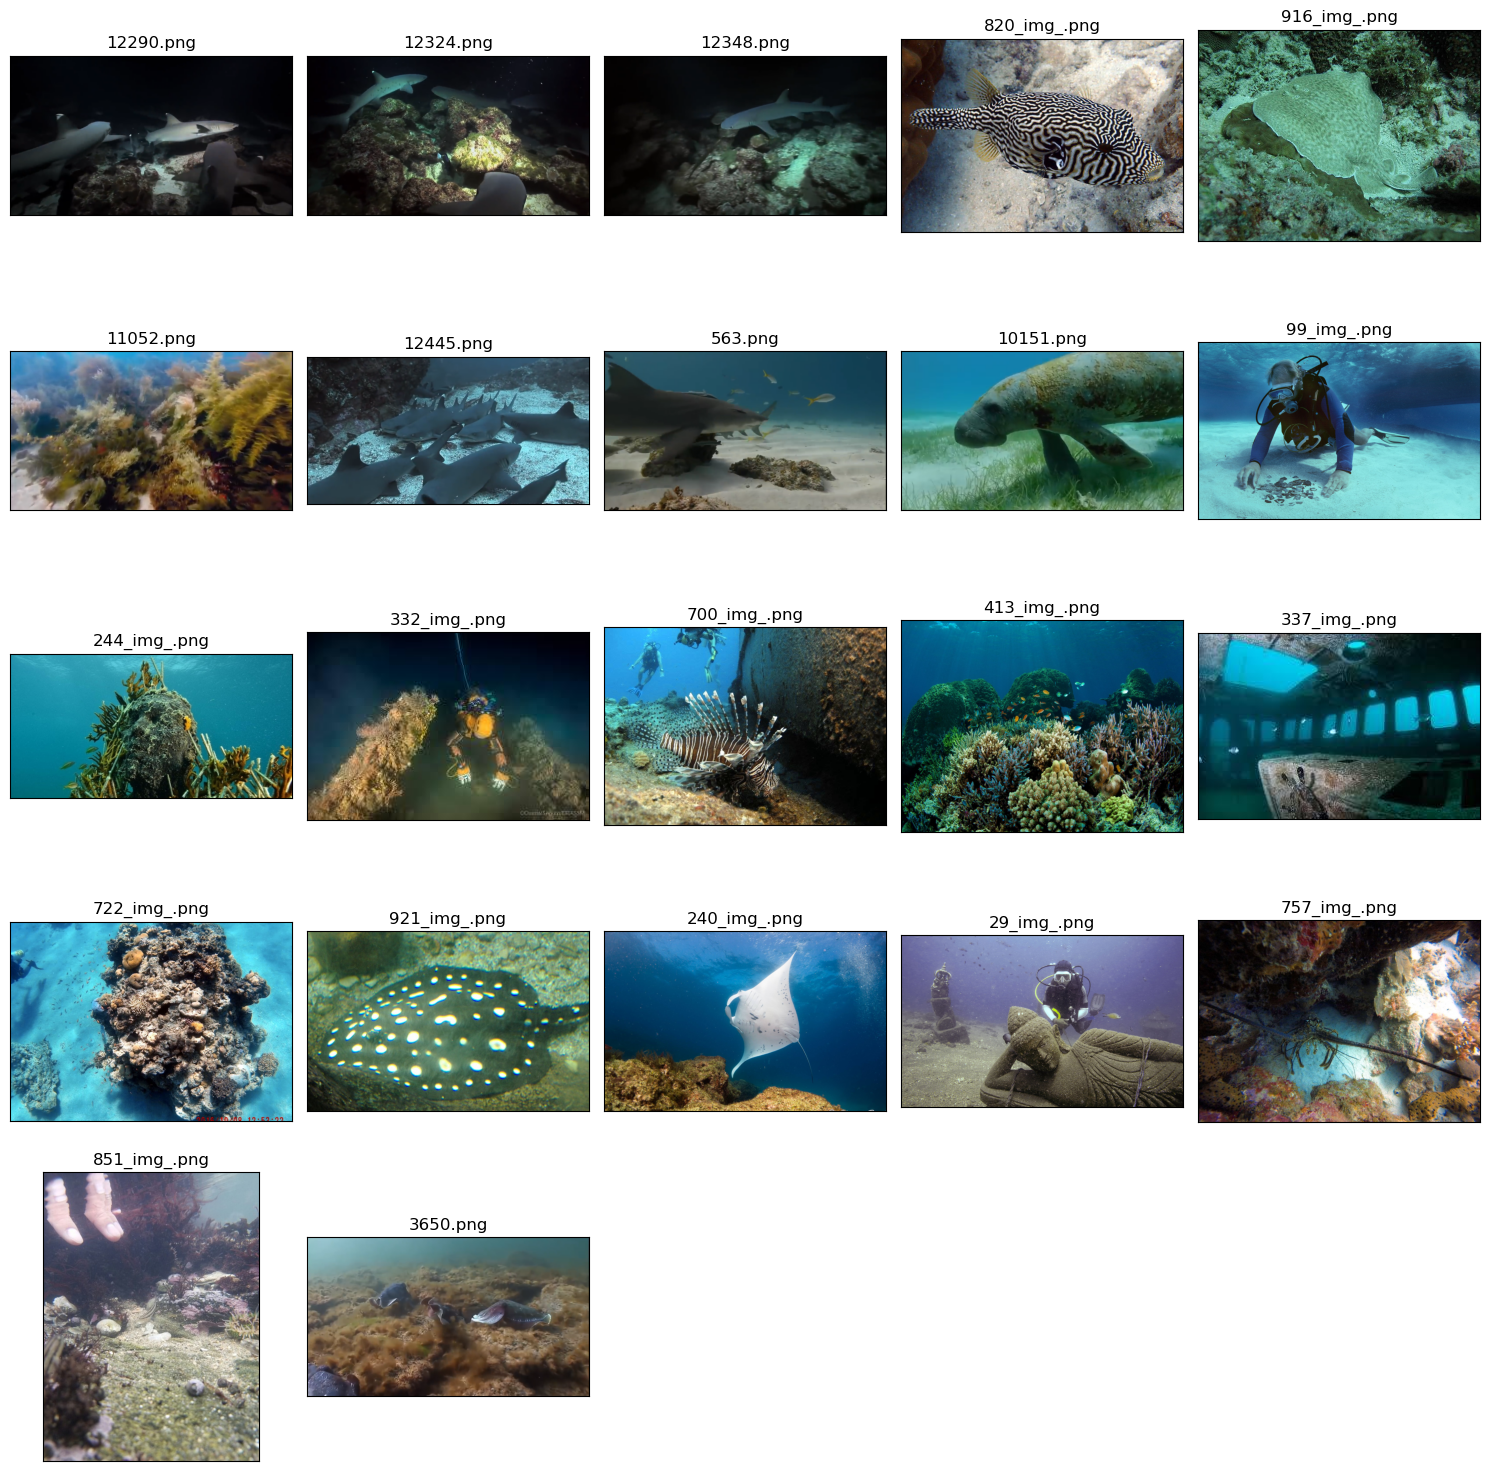

(<Figure size 1500x1500 with 22 Axes>,
 array([<Axes: title={'center': '12290.png'}>,
        <Axes: title={'center': '12324.png'}>,
        <Axes: title={'center': '12348.png'}>,
        <Axes: title={'center': '820_img_.png'}>,
        <Axes: title={'center': '916_img_.png'}>,
        <Axes: title={'center': '11052.png'}>,
        <Axes: title={'center': '12445.png'}>,
        <Axes: title={'center': '563.png'}>,
        <Axes: title={'center': '10151.png'}>,
        <Axes: title={'center': '99_img_.png'}>,
        <Axes: title={'center': '244_img_.png'}>,
        <Axes: title={'center': '332_img_.png'}>,
        <Axes: title={'center': '700_img_.png'}>,
        <Axes: title={'center': '413_img_.png'}>,
        <Axes: title={'center': '337_img_.png'}>,
        <Axes: title={'center': '722_img_.png'}>,
        <Axes: title={'center': '921_img_.png'}>,
        <Axes: title={'center': '240_img_.png'}>,
        <Axes: title={'center': '29_img_.png'}>,
        <Axes: title={'center': '757

In [31]:
import lib.init_image_group
importlib.reload(lib.init_image_group)
from lib.init_image_group import get_filenames, show_image_group_auto   
df_cluster2 = get_filenames("csv/pilihan_hasil_kmeans.csv", cluster_value=2)
df_cluster2["image"] = "../UIEB/raw-890/" + df_cluster2["filename"]
df_cluster2["label"] = df_cluster2["filename"]
show_image_group_auto(df_cluster2)

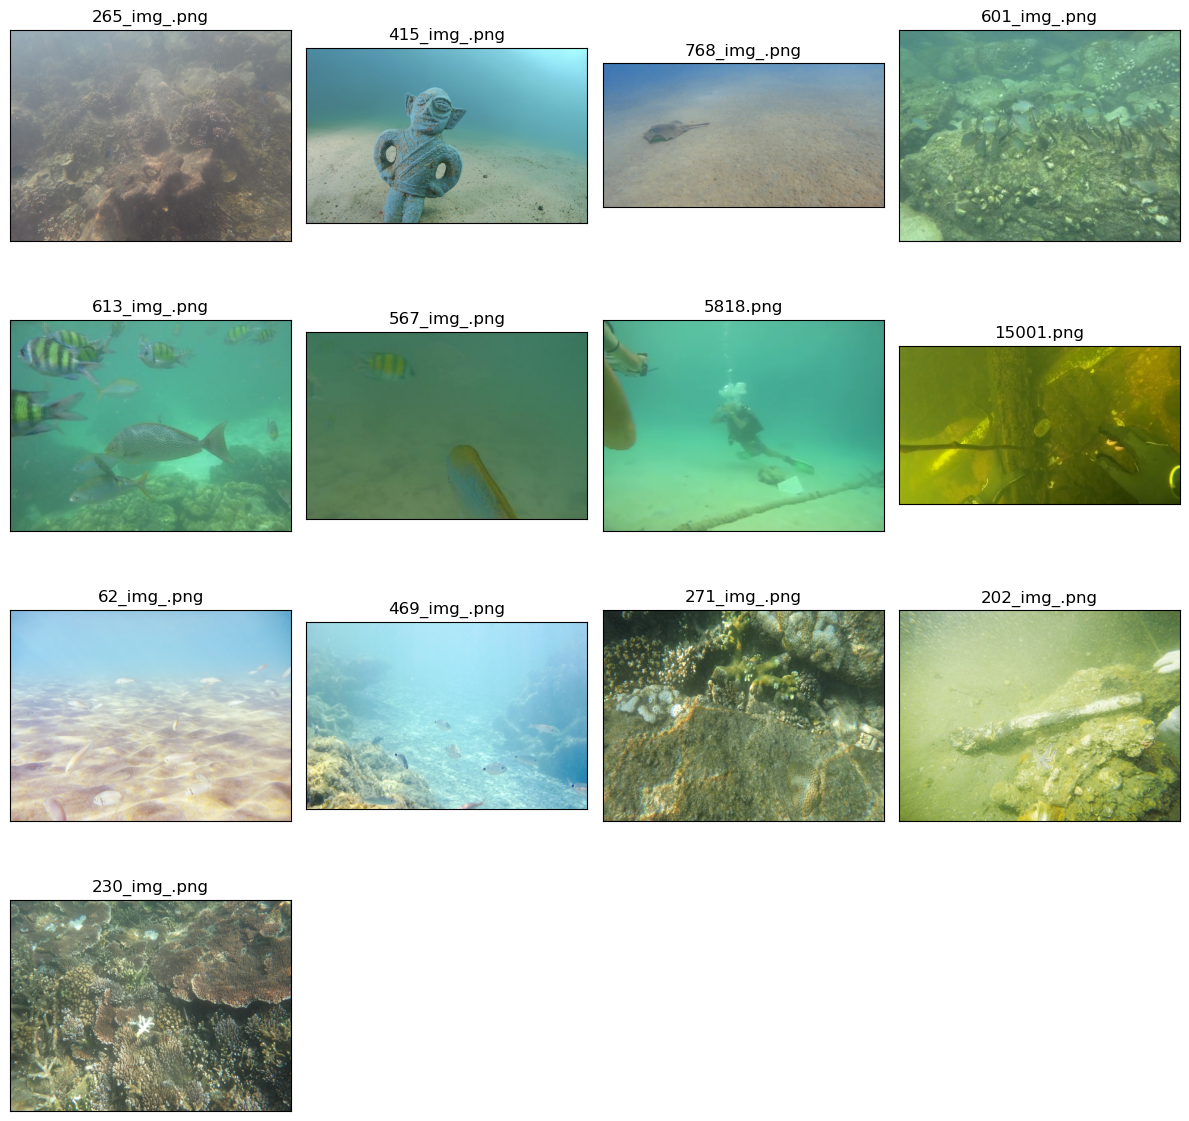

(<Figure size 1200x1200 with 13 Axes>,
 array([<Axes: title={'center': '265_img_.png'}>,
        <Axes: title={'center': '415_img_.png'}>,
        <Axes: title={'center': '768_img_.png'}>,
        <Axes: title={'center': '601_img_.png'}>,
        <Axes: title={'center': '613_img_.png'}>,
        <Axes: title={'center': '567_img_.png'}>,
        <Axes: title={'center': '5818.png'}>,
        <Axes: title={'center': '15001.png'}>,
        <Axes: title={'center': '62_img_.png'}>,
        <Axes: title={'center': '469_img_.png'}>,
        <Axes: title={'center': '271_img_.png'}>,
        <Axes: title={'center': '202_img_.png'}>,
        <Axes: title={'center': '230_img_.png'}>, <Axes: >, <Axes: >,
        <Axes: >], dtype=object))

In [32]:
import lib.init_image_group
importlib.reload(lib.init_image_group)
from lib.init_image_group import get_filenames, show_image_group_auto   
df_cluster2 = get_filenames("csv/pilihan_hasil_kmeans.csv", cluster_value=0)
df_cluster2["image"] = "../UIEB/raw-890/" + df_cluster2["filename"]
df_cluster2["label"] = df_cluster2["filename"]
show_image_group_auto(df_cluster2)

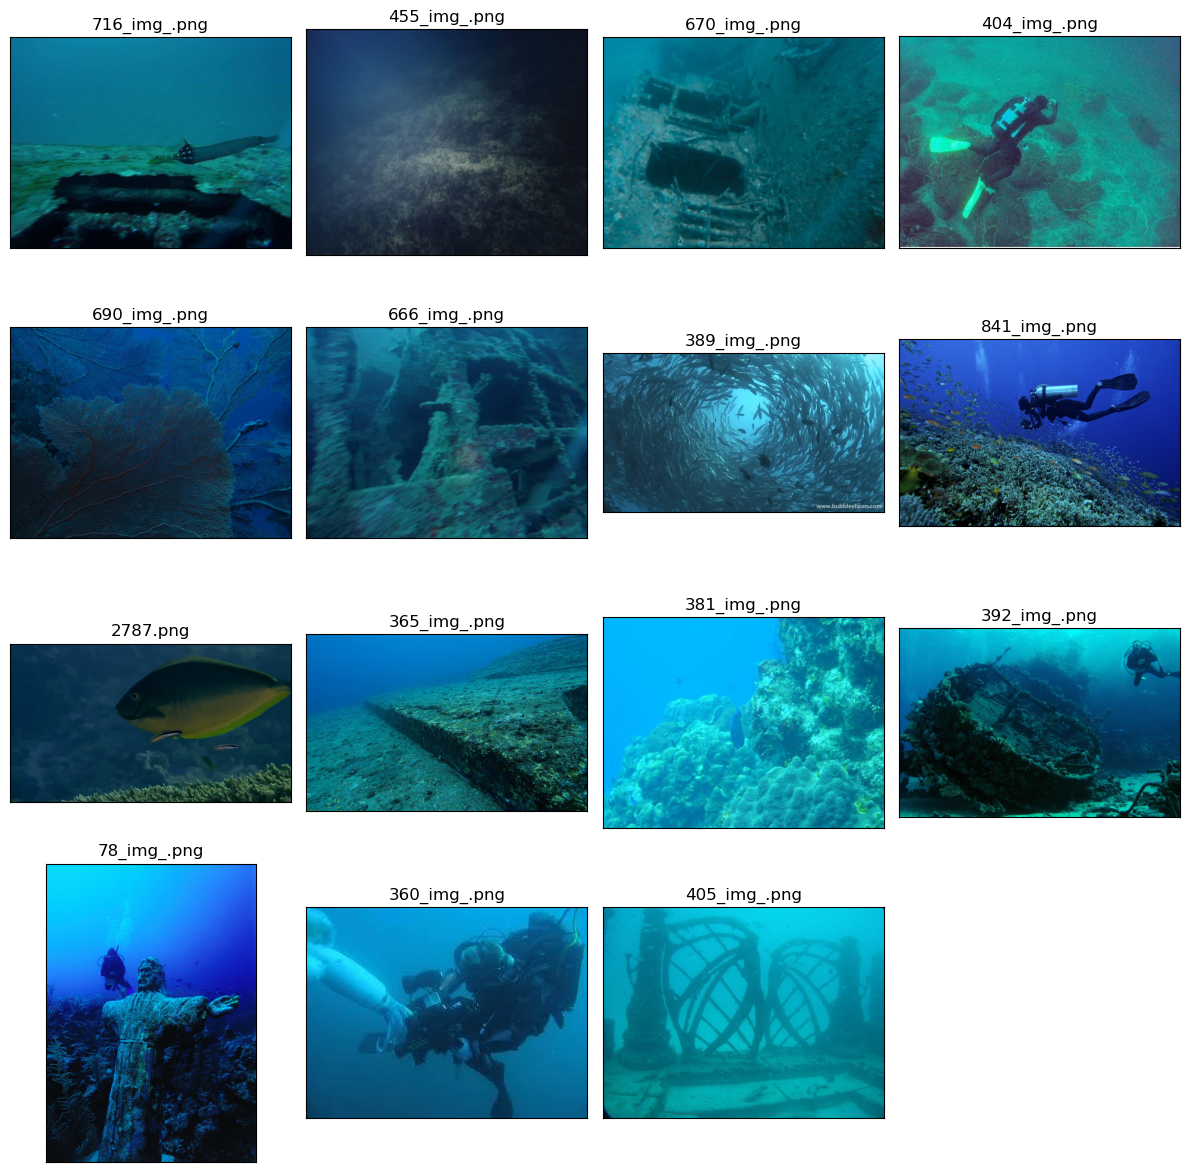

(<Figure size 1200x1200 with 15 Axes>,
 array([<Axes: title={'center': '716_img_.png'}>,
        <Axes: title={'center': '455_img_.png'}>,
        <Axes: title={'center': '670_img_.png'}>,
        <Axes: title={'center': '404_img_.png'}>,
        <Axes: title={'center': '690_img_.png'}>,
        <Axes: title={'center': '666_img_.png'}>,
        <Axes: title={'center': '389_img_.png'}>,
        <Axes: title={'center': '841_img_.png'}>,
        <Axes: title={'center': '2787.png'}>,
        <Axes: title={'center': '365_img_.png'}>,
        <Axes: title={'center': '381_img_.png'}>,
        <Axes: title={'center': '392_img_.png'}>,
        <Axes: title={'center': '78_img_.png'}>,
        <Axes: title={'center': '360_img_.png'}>,
        <Axes: title={'center': '405_img_.png'}>, <Axes: >], dtype=object))

In [33]:
import lib.init_image_group
importlib.reload(lib.init_image_group)
from lib.init_image_group import get_filenames, show_image_group_auto   
df_cluster2 = get_filenames("csv/pilihan_hasil_kmeans.csv", cluster_value=1)
df_cluster2["image"] = "../UIEB/raw-890/" + df_cluster2["filename"]
df_cluster2["label"] = df_cluster2["filename"]
show_image_group_auto(df_cluster2)